In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df = df.select_dtypes(include = ['float64', 'int64'])#sadece sayısal değişkenlere erişmek için seçeriz
df = df.dropna()#eksik değerleri sildik 
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

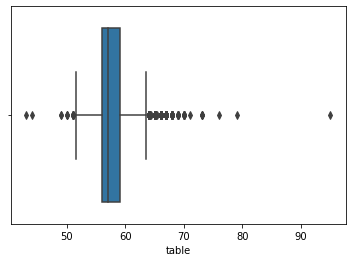

In [6]:
sns.boxplot(x=df_table)

In [7]:
#şimdiiii eşik değer belirleyelim

In [2]:
Q1=df_table.quantile(0.25) #değişkenin %25. indeksine gelen değeri alacak
Q3=df_table.quantile(0.75)
IQR=Q3-Q1
Q1

NameError: name 'df_table' is not defined

In [11]:
Q3

59.0

In [12]:
IQR

3.0

In [19]:
alt_sinir=Q1-1.5*(IQR) #teorik kısımda öğrendiğimiiz basit hesaplama formülü. deftere yazıyor.
us_sinir=Q3+1.5*(IQR)

In [1]:
x=(df_table>us_sinir)

NameError: name 'df_table' is not defined

In [20]:
alt_sinir

51.5

In [21]:
us_sinir

63.5

In [22]:
#şimdi bu alt, üst sınırdan aşağı ya da yukarı olan degerlere nasıl erişecegimize bir bakalım

In [24]:
(( df_table<alt_sinir) | (df_table>us_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [26]:
aykiri_tf = (df_table < alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [27]:
#şimdi fancy index yardimi ile degerlere erişelim

In [28]:
#FANCY indexin güzelliği... 
df_table[aykiri_tf] # diye çalıştırırsak sadece true degerleri döneceğinden 
                    #degerler gelmiş olur 
#FANCY indexin içine indeks, aralıkta girebiliyorduk. ve tabikiTrue false degerleride yakalar


1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [29]:
df_table[aykiri_tf].index   #dersek indexleri görürüz. ve ileride bu 
                            #indexlere işlem yapmak istersek kullanacağız.

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

**SİLME YAKLAŞIMI**

In [31]:
import pandas as pd 

In [32]:
type(df_table)

pandas.core.series.Series

In [34]:
#pandas serisi formunda. bunu bir pandas dataframe'ine çevirelim 

In [35]:
df_table=pd.DataFrame(df_table)

In [36]:
df_table.shape

(53940, 1)

In [51]:
#aykırı olmayan degerlere erişmeye çalışalım.
aykırı_durumlar=(( df_table<alt_sinir) | (df_table>us_sinir)).any(axis=1)
#burada .any(axis=1) olmadığında silinen değerler nan olurken, .any(axis=1) yazdığımızda nan değer de olmuoyor
temiz_df=df_table[~(aykırı_durumlar)]
#tilda "~" işareti "Değil anlamında dır"
temiz_df.head()

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0


In [52]:
temiz_df.shape

(53335, 1)

In [ ]:
#600 kadar değer silindi...

**Bir Diğer aykırı yöntem mücadele şekli, "ortalama ile doldurma"**

In [53]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [55]:
df_table=df["table"]
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [57]:
 df_table[aykiri_tf]
#aykiri degerlerimiz bunlar. ama az sonra ortalama degerler olacaklar

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [59]:
df_table.mean()

57.45718390804603

In [60]:
df_table[aykiri_tf]=df_table.mean()

C:\Users\bedir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
 #uyarıyı görmezden geldik
    df_table[aykiri_tf]
#aykiri değerlerimiz ortalama değerlermiz ile eşit

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

**Baskılama Yöntemi**

In [62]:
#bu yöntemde aykırılar yakalandıktan sonra üst taraftaysa üst, alttaysa alt sınır değerine eşitlenir. 
#sanki daha mantıklı |yani sınırlara soüru baskılıcaz.

In [63]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [65]:
df_table=df["table"]
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [68]:
alt_sinir=Q1-1.5*(IQR) #teorik kısımda öğrendiğimiiz basit hesaplama formülü. deftere yazıyor.
us_sinir=Q3+1.5*(IQR)
alt_sinir

51.5

In [69]:
df_table[aykiri_tf]=alt_sinir

C:\Users\bedir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64